Detailed Kafka: https://www.hellointerview.com/learn/system-design/deep-dives/kafka

## Kafka Basic Terminology and Architecture

Apache Kafka is an open-source distributed event streaming platform that can be used either as a message queue or as a stream processing system. Kafka excels in delivering high performance, scalability, and durability. It’s engineered to handle vast volumes of data in real-time, ensuring that no message is ever lost and that each piece of data is processed as swiftly as possible.

- **Kafka Cluster**: A collection of multiple brokers (servers), which store data and serve clients. More brokers mean more storage and capacity to handle clients.

- **Broker**: An individual server in the Kafka cluster responsible for storing data and serving clients.

- **Partition**: A partition is an ordered, immutable sequence of messages (like a log file) that Kafka uses to scale by allowing parallel message consumption.

- **Topic**: A logical grouping of partitions. Topics are how you publish and subscribe to messages in Kafka. **Topics are always multi-producer**, meaning multiple producers can write to the same topic.

- **Topic vs Partition**:
  - **Topic**: Logical grouping of messages.
  - **Partition**: Physical grouping of messages, used to scale and distribute data across brokers.<br>

- **Producers and Consumers**:
  - **Producers**: Write data to topics.
  - **Consumers**: Read data from topics.
  - Kafka handles the storage and serving of messages, but the creation and processing of the data are up to the developer.

- **Kafka as a Message Queue vs. Stream**:
  - **Message Queue**: Consumers acknowledge messages after processing them.
  - **Stream**: Consumers process messages without explicitly acknowledging them, allowing for more complex data processing.


So what is the difference between a topic and a partition?

A topic is a logical grouping of messages. A partition is a physical grouping of messages. A topic can have multiple partitions, and each partition can be on a different broker. Topics are just a way to organize your data, while partitions are a way to scale your data.

### Role of zookeeper

- **Metadata Storage**: Zookeeper stores information about topics, partitions, brokers, and consumer groups.
- **Broker Coordination**: Coordinates broker states and helps brokers communicate with each other.
- **Leader Election**: Assigns leaders to partitions and reassigns leadership in case of failures.
- **Consumer Group Management**: Tracks offsets and coordinates consumer group membership and partition assignment.
- **Fault Tolerance**: Helps Kafka recover from broker failures by reassigning partition leaders.
- **Configuration Management**: Manages cluster-wide configuration settings.
- **Transitioning to KRaft Mode**: Newer Kafka versions are phasing out Zookeeper for a self-managed model.


### How Sequential I/O Helps Kafka Achieve High Performance

Kafka's performance is largely driven by its use of **sequential I/O**. Here’s how sequential I/O contributes to Kafka's efficiency:

- **Efficient Disk Usage**: 
  - Kafka writes and reads data in **large sequential chunks**. Sequential I/O is much faster than random access because modern disks (especially HDDs) are optimized for sequential operations. This reduces seek time and improves throughput.

- **Log-Based Storage**:
  - Kafka stores messages in **immutable log files**, meaning data is continuously appended to the end of these files. This sequential access pattern maximizes disk performance, as it avoids random disk seeks, which are more costly in terms of time and resources.

- **High Throughput**:
  - Kafka can write and read data in **large batches**. Sequential I/O allows Kafka to efficiently handle these large batches, reducing the overhead of disk I/O and increasing throughput.

- **Message Compression**:
  - Sequential writes allow for better **data compression**, as Kafka can compress data more effectively when writing in large sequential chunks, reducing disk space usage and improving network performance.

- **Reduced Latency**:
  - Since Kafka writes data sequentially to disk and doesn't require frequent disk seeks, it achieves lower latency when accessing data, especially when compared to systems that rely on random I/O.

- **Efficient Replica Syncing**:
  - Kafka replicates data across multiple brokers using the same sequential I/O principle, ensuring that data replication is fast and efficient. Replicas read from the leader partition sequentially, reducing the cost of replication.

By using sequential I/O, Kafka achieves high throughput, low latency, and efficient disk usage, which are key factors in its ability to handle large-scale, real-time data streaming.


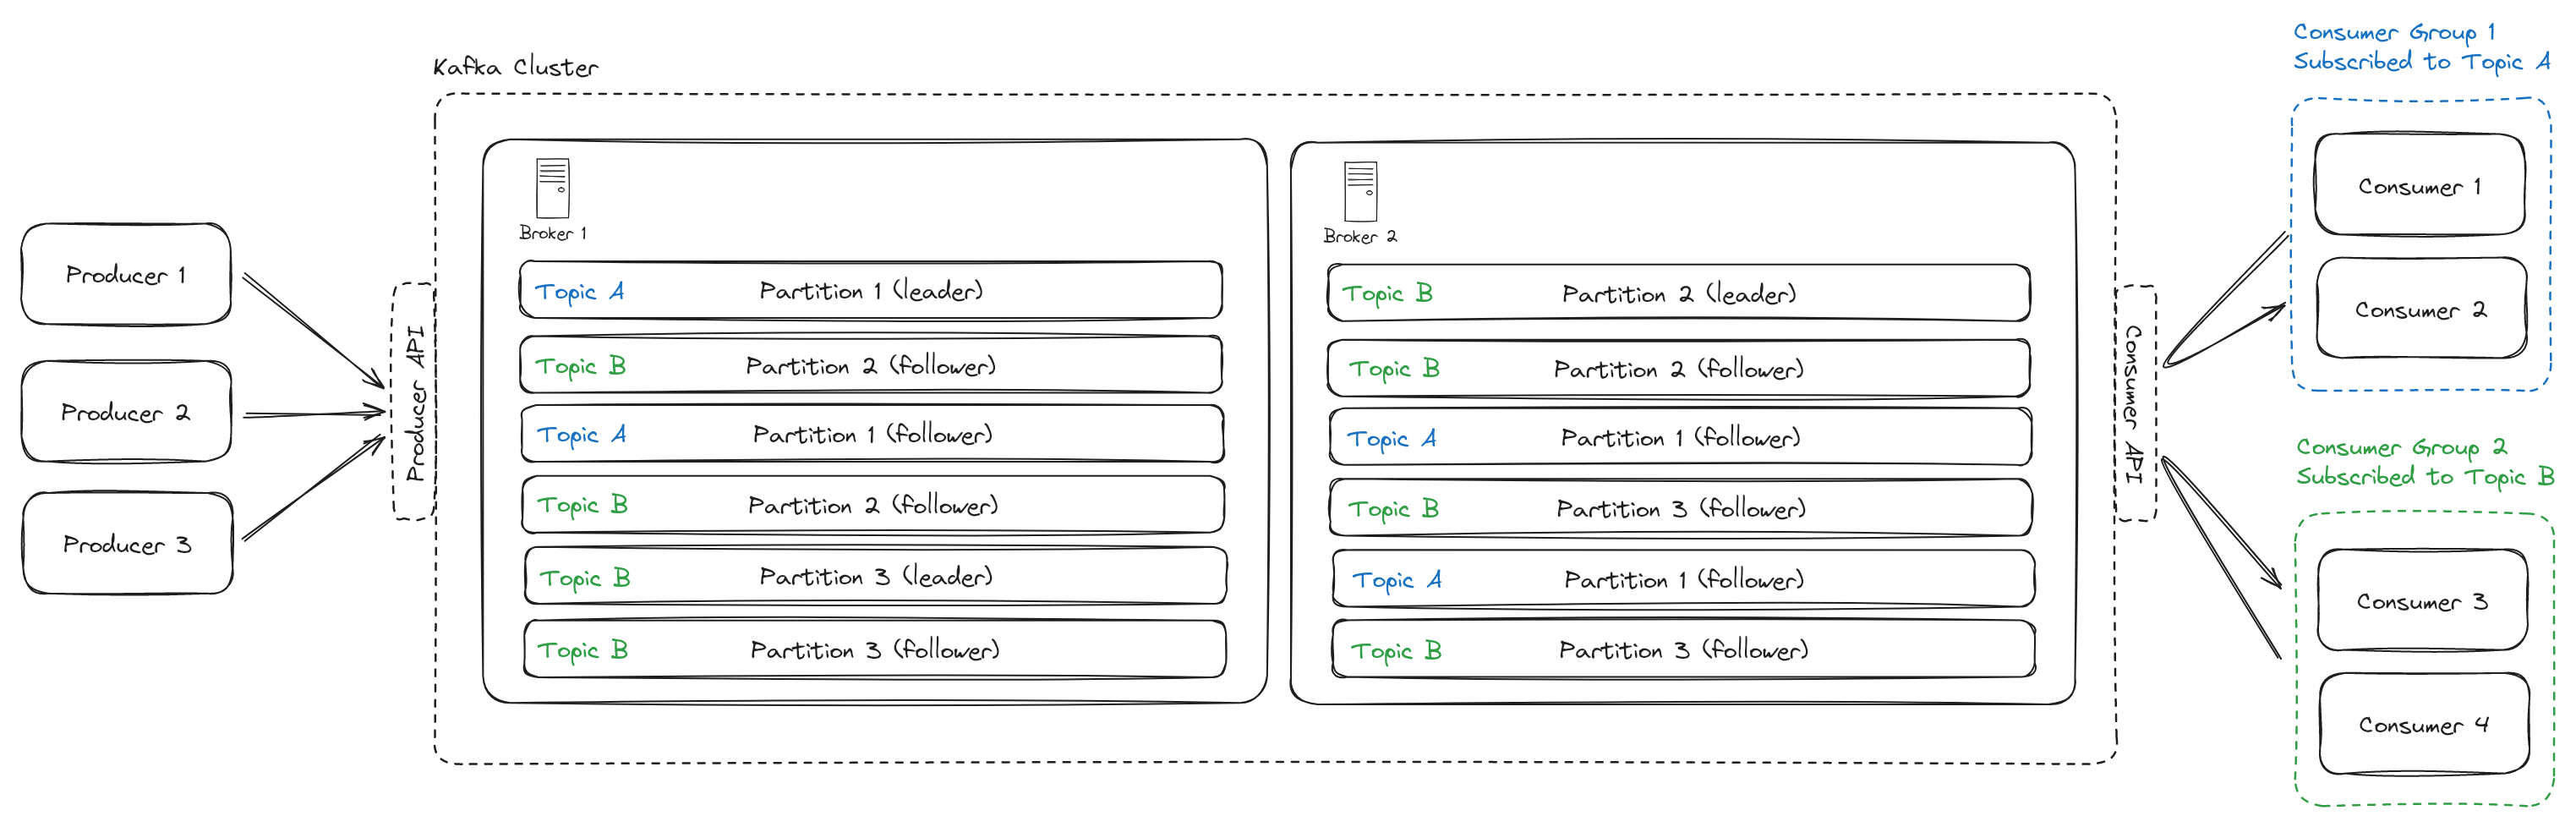

## Fault Tolerance and Durability

If you chose Kafka, one reason may have been because of its strong durability guarantees. But how does Kafka ensure that your data is safe and that no messages are lost?

Kafka ensures data durability through its replication mechanism. Each partition is replicated across multiple brokers, with one broker acting as the leader and others as followers. When a producer sends a message, it is written to the leader and then replicated to the followers. This ensures that even if a broker fails, the data remains available. Producer acknowledgments (acks setting) play a crucial role here. Setting acks=all ensures that the message is acknowledged only when all replicas have received it, guaranteeing maximum durability.

Depending on how much durability you need, you can configure the replication factor of your topics. The replication factor is the number of replicas that are maintained for each partition. A replication factor of 3 is common, meaning that each partition has 2 replicas. So if one broker fails, the data is still available on the other two and we can promote a follower to be the new leader.